In [17]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
file_path = "../../data/processed/nvidia_grouped_preprocessed/posts_by_month.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

# Flatten into a single list of all posts
all_posts = []
for month, posts in json_data.items():
    all_posts.extend(posts)  # Combine all posts into one list

# Create DataFrame
df = pd.DataFrame(all_posts)


In [19]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,comments
0,2025-04,game ready studio driver 57602 faqdiscussion,2025-04-16,17:47:13,589,2181,Discussion,game ready studio driver 57602 has been rele...,game ready studio driver 57602 faqdiscussion ...,[]
1,2025-04,tech support and question megathread april 20...,2025-04-01,10:45:43,6,29,Tech Support,were consolidating all tech support posts and ...,tech support and question megathread april 20...,[]
2,2025-04,rtx 5070 ti performance scaling 57602 vs 57283...,2025-04-19,01:35:23,348,89,Benchmarks,on the day of the release of the new nvidia dr...,rtx 5070 ti performance scaling 57602 vs 57283...,[]
3,2025-04,5090 storm trooper,2025-04-19,04:54:58,93,15,Build/Photos,this is my first time hard tubing and its been...,5090 storm trooper this is my first time hard ...,[]
4,2025-04,5090 astral lc,2025-04-18,21:01:07,210,116,Build/Photos,astral 5090 lc installed today using hwmonito...,5090 astral lc astral 5090 lc installed today ...,[]


# Sentiment over time

In [20]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and sum the scores
daily_scores = df.groupby(df['date'].dt.date)['score'].sum().reset_index()

# Rename columns for clarity
daily_scores.columns = ['day', 'score']

print(daily_scores.head())


          day  score
0  2016-05-17      0
1  2017-02-15      3
2  2018-08-26     48
3  2018-08-30     32
4  2018-08-31      1


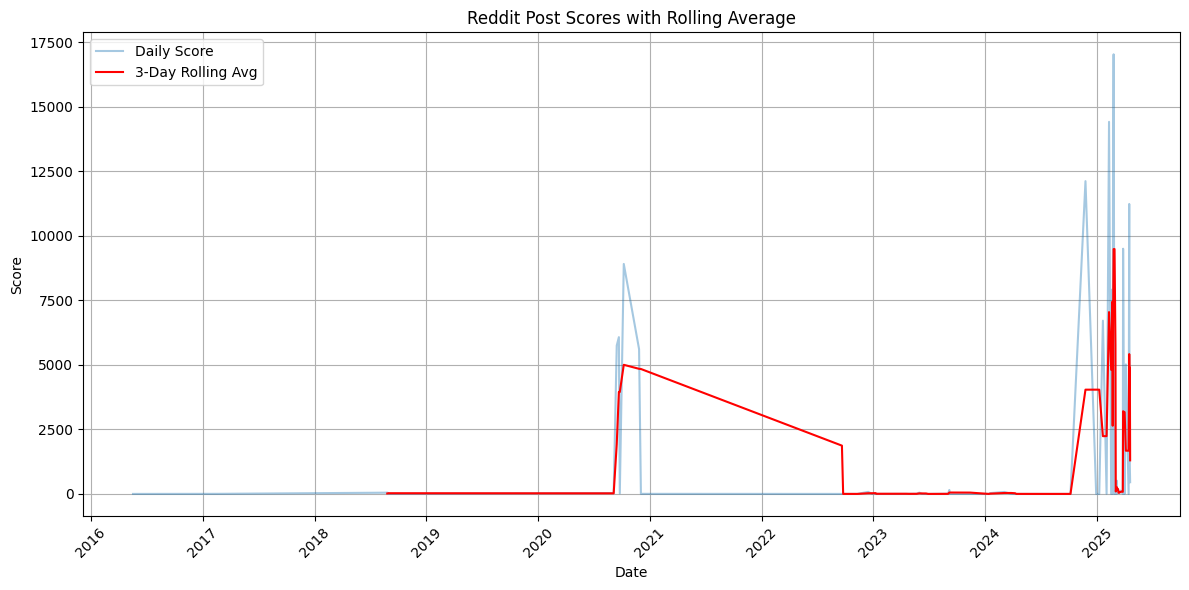

In [21]:
daily_scores['rolling_score'] = daily_scores['score'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_scores['day'], daily_scores['score'], alpha=0.4, label='Daily Score')
plt.plot(daily_scores['day'], daily_scores['rolling_score'], color='red', label='3-Day Rolling Avg')
plt.title("Reddit Post Scores with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Text Based Analysis

In [22]:
text = df["combined_text"]

In [23]:
from collections import Counter
import re

# Total character counts per post
character_count = list(map(lambda x:len(x),text))

df["character_count"] = character_count

# Total word count per post
word_counts = list(map(lambda s: len(s.split()), text))
df["Word_count"] = word_counts

# Seperated Words from total list
words = [word.lower() for t in text for word in re.findall(r'\b\w+\b', t)]
# df["Sepeated_words"] = words

# Sepeated words PER list
words_per_list = []
for t in text:
    words_per_list.append([text.lower() for text in re.findall(r'\b\w+\b', t)])

df["Seperated_List"] = words_per_list

# Frequncy of words in the entire dataframe
word_freq_counts = Counter(words)

In [26]:
# nlt.download('stopwords',download_dir="/src/EDA")
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,comments,character_count,Word_count,Seperated_List
0,2025-04,game ready studio driver 57602 faqdiscussion,2025-04-16,17:47:13,589,2181,Discussion,game ready studio driver 57602 has been rele...,game ready studio driver 57602 faqdiscussion ...,[],9756,1595,"[game, ready, studio, driver, 57602, faqdiscus..."
1,2025-04,tech support and question megathread april 20...,2025-04-01,10:45:43,6,29,Tech Support,were consolidating all tech support posts and ...,tech support and question megathread april 20...,[],4162,683,"[tech, support, and, question, megathread, apr..."
2,2025-04,rtx 5070 ti performance scaling 57602 vs 57283...,2025-04-19,01:35:23,348,89,Benchmarks,on the day of the release of the new nvidia dr...,rtx 5070 ti performance scaling 57602 vs 57283...,[],486,81,"[rtx, 5070, ti, performance, scaling, 57602, v..."
3,2025-04,5090 storm trooper,2025-04-19,04:54:58,93,15,Build/Photos,this is my first time hard tubing and its been...,5090 storm trooper this is my first time hard ...,[],539,102,"[5090, storm, trooper, this, is, my, first, ti..."
4,2025-04,5090 astral lc,2025-04-18,21:01:07,210,116,Build/Photos,astral 5090 lc installed today using hwmonito...,5090 astral lc astral 5090 lc installed today ...,[],245,43,"[5090, astral, lc, astral, 5090, lc, installed..."


In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  # Load English stopwords
words = [w for w in words if w not in stop_words]
print(words)
word_freq_counts = Counter(words)
most_common = word_freq_counts.most_common(20)  

common_words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
common_words_df.head()

['game', 'ready', 'studio', 'driver', '57602', 'faqdiscussion', 'game', 'ready', 'studio', 'driver', '57602', 'released', 'two', 'pages', 'worth', 'fixes', 'cannot', 'find', 'driver', 'nvidia', 'website', 'search', 'showing', 'nvidia', 'app', 'please', 'give', 'time', 'propagate', 'article', 'link', 'game', 'ready', 'driver', 'direct', 'download', 'link', 'link', 'studio', 'driver', 'direct', 'download', 'link', 'link', 'new', 'feature', 'fixes', 'driver', '57602', 'game', 'ready', 'new', 'game', 'ready', 'driver', 'supports', 'new', 'geforce', 'rtx', '5060', 'ti', 'gpu', 'provides', 'best', 'gaming', 'experience', 'latest', 'new', 'games', 'supporting', 'dlss', '4', 'technology', 'including', 'black', 'myth', 'wukong', 'room', 'hell', '2', 'gaming', 'technology', 'adds', 'support', 'geforce', 'rtx', '5060', 'ti', 'applications', 'april', 'nvidia', 'studio', 'driver', 'offers', 'support', 'new', 'geforce', 'rtx', '5060', 'ti', 'well', 'latest', 'new', 'creative', 'applications', 'updat

,Word,Frequency
0,rtx,115
1,gpu,104
2,nvidia,82
3,im,81
4,get,77


In [28]:
from nltk.util import ngrams

# Generate unigrams, bigrams, trigrams
unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Count most common n-grams

grams_df = pd.DataFrame()
grams_df["bigrams"] = Counter(bigrams).most_common(20)
grams_df["trigrams"] = Counter(trigrams).most_common(20)
grams_df.head()


,bigrams,trigrams
0,"((50, series), 30)","((rtx, 50, series), 19)"
1,"((rtx, 50), 19)","((inflation, cost, 2018), 10)"
2,"((5060, ti), 18)","((rtx, 5070, ti), 8)"
3,"((frame, generation), 18)","((rtx, 5060, ti), 6)"
4,"((5070, ti), 16)","((nvidia, control, panel), 6)"


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sent = df['combined_text'].apply(lambda post: sia.polarity_scores(post)['compound'])
df["Sentiment"] = sent
print(sent)

0      0.9463
1      0.9957
2      0.3182
3      0.8063
4      0.4372
        ...  
167    0.5754
168   -0.4767
169    0.0000
170   -0.7060
171   -0.9646
Name: combined_text, Length: 172, dtype: float64


In [32]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,comments,character_count,Word_count,Seperated_List,Sentiment
0,2025-04,game ready studio driver 57602 faqdiscussion,2025-04-16,17:47:13,589,2181,Discussion,game ready studio driver 57602 has been rele...,game ready studio driver 57602 faqdiscussion ...,[],9756,1595,"[game, ready, studio, driver, 57602, faqdiscus...",0.9463
1,2025-04,tech support and question megathread april 20...,2025-04-01,10:45:43,6,29,Tech Support,were consolidating all tech support posts and ...,tech support and question megathread april 20...,[],4162,683,"[tech, support, and, question, megathread, apr...",0.9957
2,2025-04,rtx 5070 ti performance scaling 57602 vs 57283...,2025-04-19,01:35:23,348,89,Benchmarks,on the day of the release of the new nvidia dr...,rtx 5070 ti performance scaling 57602 vs 57283...,[],486,81,"[rtx, 5070, ti, performance, scaling, 57602, v...",0.3182
3,2025-04,5090 storm trooper,2025-04-19,04:54:58,93,15,Build/Photos,this is my first time hard tubing and its been...,5090 storm trooper this is my first time hard ...,[],539,102,"[5090, storm, trooper, this, is, my, first, ti...",0.8063
4,2025-04,5090 astral lc,2025-04-18,21:01:07,210,116,Build/Photos,astral 5090 lc installed today using hwmonito...,5090 astral lc astral 5090 lc installed today ...,[],245,43,"[5090, astral, lc, astral, 5090, lc, installed...",0.4372


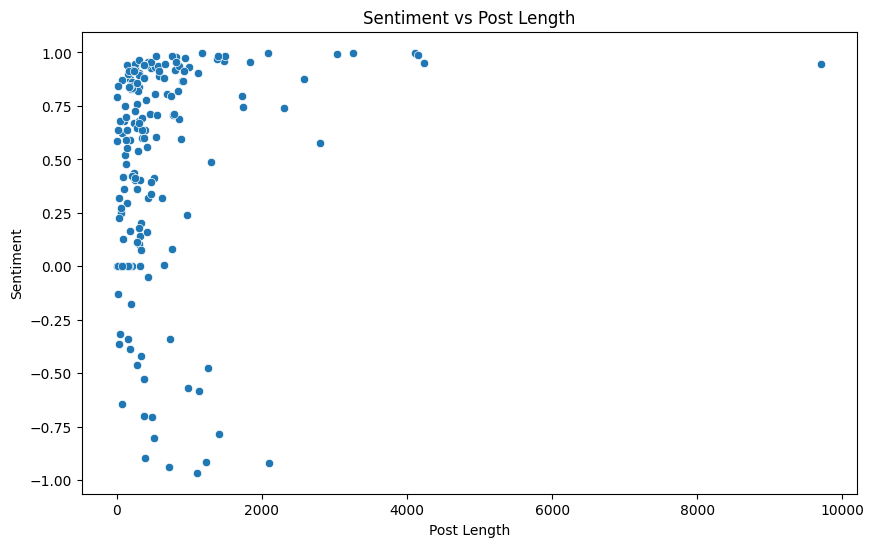

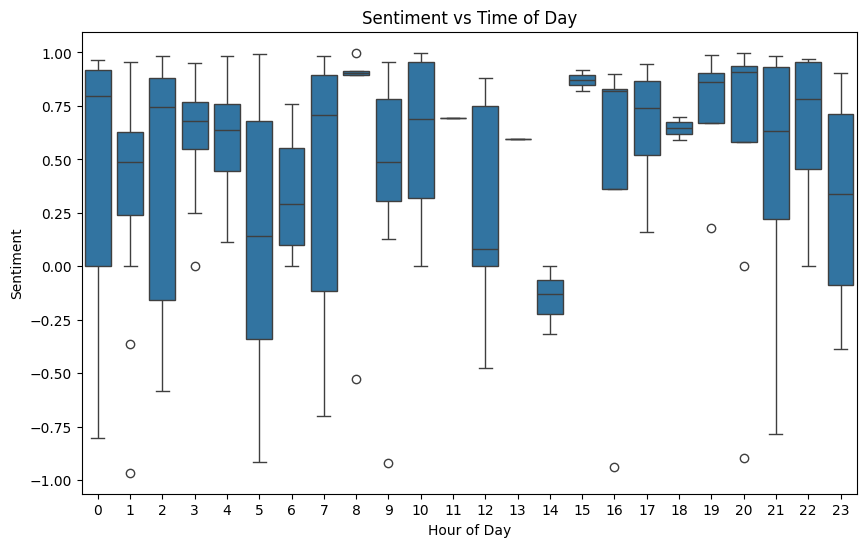

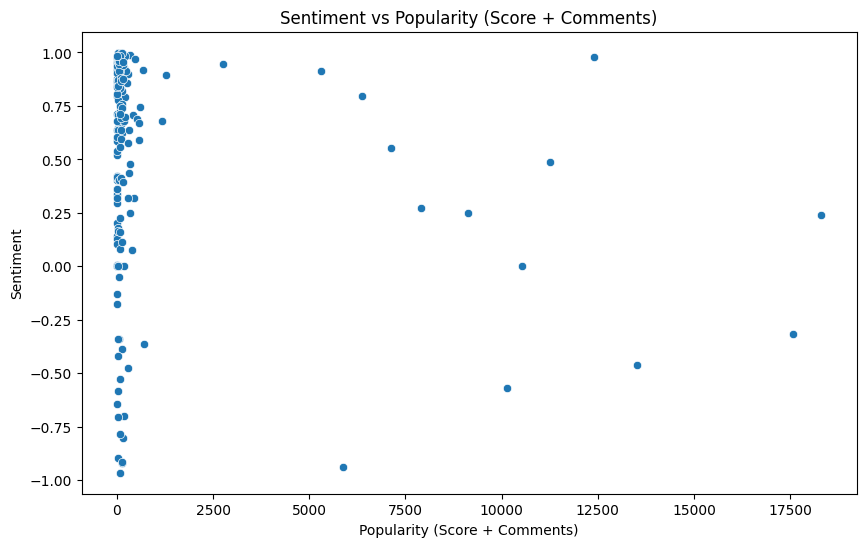

             post_length      hour  popularity  Sentiment
post_length     1.000000 -0.002091    0.015879   0.178520
hour           -0.002091  1.000000    0.024986   0.073958
popularity      0.015879  0.024986    1.000000  -0.164840
Sentiment       0.178520  0.073958   -0.164840   1.000000


In [33]:
###-------------------------------------------------------CHATGPT COPY PASTE HO I AINT TAKING NO ACCOUNTABILITY-----------------------------------------------------


# Assuming the DataFrame is already loaded as df
# # Create a new column for post length (character count in the 'body' column)
df['post_length'] = df['body'].apply(len)

# Extract hour from the 'time' column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Analyze sentiment vs post length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='Sentiment')
plt.title('Sentiment vs Post Length')
plt.xlabel('Post Length')
plt.ylabel('Sentiment')
plt.show()

# Analyze sentiment vs time of day
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hour', y='Sentiment')
plt.title('Sentiment vs Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Sentiment')
plt.show()

# Analyze sentiment vs popularity (score and num_comments)
df['popularity'] = df['score'] + df['num_comments']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='Sentiment')
plt.title('Sentiment vs Popularity (Score + Comments)')
plt.xlabel('Popularity (Score + Comments)')
plt.ylabel('Sentiment')
plt.show()

# Correlations (Post length, Time, Popularity with Sentiment)
correlations = df[['post_length', 'hour', 'popularity', 'Sentiment']].corr()
print(correlations)


In [34]:
relevant_columns = ['date', 'score', 'num_comments', 'flair','character_count','Word_count', 'Sentiment','post_length','hour', "popularity"]
new_df = df[relevant_columns]
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity
0,2025-04-16,589,2181,Discussion,9756,1595,0.9463,9710,17,2770
1,2025-04-01,6,29,Tech Support,4162,683,0.9957,4105,10,35
2,2025-04-19,348,89,Benchmarks,486,81,0.3182,431,1,437
3,2025-04-19,93,15,Build/Photos,539,102,0.8063,520,4,108
4,2025-04-18,210,116,Build/Photos,245,43,0.4372,230,21,326


In [35]:
sentiment_vs_date = new_df[['date', 'Sentiment']]


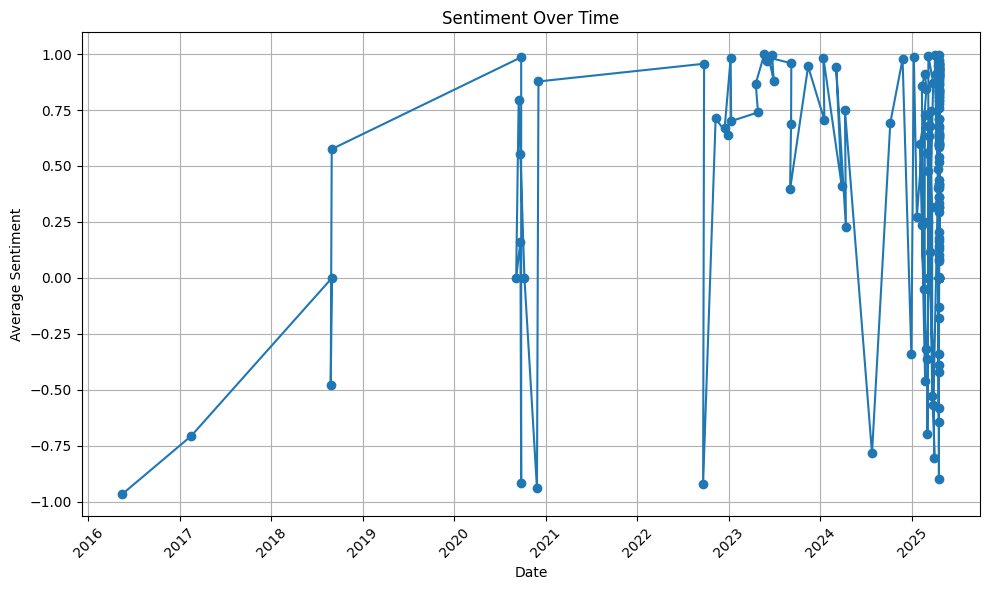

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sentiment_vs_date['date'], sentiment_vs_date['Sentiment'], marker='o')
plt.xticks(rotation=45)
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()
